In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

In [127]:
Mexico  = pd.read_csv('Mexico_datos_limpios.csv')
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   listing_url                                   26582 non-null  object 
 2   last_scraped                                  26582 non-null  object 
 3   description                                   26582 non-null  object 
 4   host_url                                      26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_response_rate                            26582 non-null  object 
 8   host_acceptance_rate                          26582 non-null  object 
 9   host_is_superhost                             26582 non-null 

**Analisis univariado de las variables categoricas**

In [128]:
# Vemos las tablas de frecuencia de las variables categóricas
categorical_columns = Mexico.select_dtypes(include=['object', 'category']).columns

# Inicializar el contador
contador = 0

for col in categorical_columns:
    contador += 1
    print(f"Tabla de frecuencias {contador} para la columna '{col}':")
    print(freq_tbl(Mexico[col]))
    print("\n")

# Mostrar el total de tablas de frecuencias generadas
print(f"Total de tablas de frecuencias generadas: {contador}")

Tabla de frecuencias 1 para la columna 'listing_url':
                                            listing_url  frequency  \
0                    https://www.airbnb.com/rooms/35797          1   
1       https://www.airbnb.com/rooms/897363738676670896          1   
2       https://www.airbnb.com/rooms/897393613987324079          1   
3       https://www.airbnb.com/rooms/894989092198576906          1   
4       https://www.airbnb.com/rooms/894977949284306624          1   
...                                                 ...        ...   
26577             https://www.airbnb.com/rooms/47124933          1   
26578             https://www.airbnb.com/rooms/47123755          1   
26579             https://www.airbnb.com/rooms/47036712          1   
26580             https://www.airbnb.com/rooms/47035738          1   
26581  https://www.airbnb.com/rooms/1252229157495978163          1   

       percentage  cumulative_perc  
0        0.000038         0.000038  
1        0.000038         0.000

**Extracción de Caracteristicas de "room_type"**

In [129]:
#Obtengo un analisis univariado de la variable categorica room_type
table1 = freq_tbl(Mexico['room_type'])
table1 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table1 = table1.set_index('room_type')
table1

,frequency
room_type,
Entire home/apt,17363
Private room,8693
Shared room,401
Hotel room,125


<Axes: ylabel='frequency'>

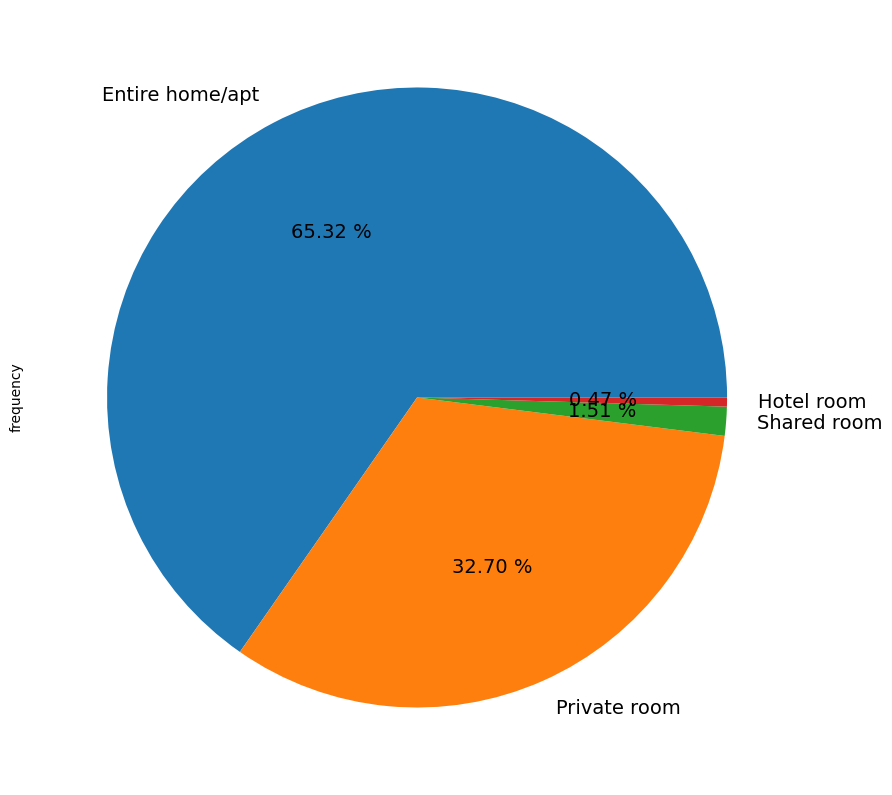

In [130]:
#realizamos grafico de pastel 
table1["frequency"].plot(kind='pie', figsize=(10, 15), autopct='%0.2f %%', textprops={'fontsize': 14, })

**Extracción de Caracteristicas de "property_type"**

In [131]:
#Obtengo un analisis univariado de la variable categorica room_type
table2 = freq_tbl(Mexico['property_type'])
table2 = table2.drop(['percentage', 'cumulative_perc'], axis=1)
table2 = table2[table2['frequency'] > 15]
table2 = table2.set_index('property_type')
table2

,frequency
property_type,
Entire rental unit,9971
Entire condo,3423
Private room in rental unit,3034
Private room in home,2266
Entire loft,1515
Private room in condo,846
Entire serviced apartment,846
Entire home,817
Room in hotel,504


<Axes: xlabel='property_type'>

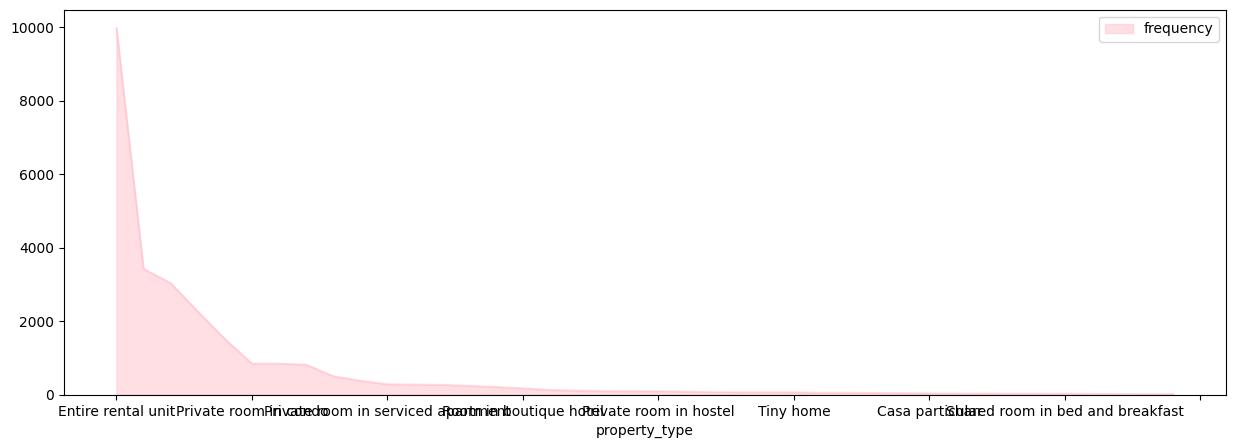

In [132]:
#Realizamos un grafico de area del dataframe filtrado
table2.plot(kind='area', color='pink', figsize=(15, 5),alpha=0.5)

**Extracción de Caracteristicas de "neighbourhood_cleansed"**

In [133]:
table3 = freq_tbl(Mexico['neighbourhood_cleansed'])
table3 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
table3 = table3.set_index('neighbourhood_cleansed')
table3

,frequency
neighbourhood_cleansed,
Cuauhtémoc,12231
Miguel Hidalgo,4533
Benito Juárez,3152
Coyoacán,1719
Álvaro Obregón,1075
Tlalpan,812
Venustiano Carranza,734
Gustavo A. Madero,506
Cuajimalpa de Morelos,442


<Axes: ylabel='frequency'>

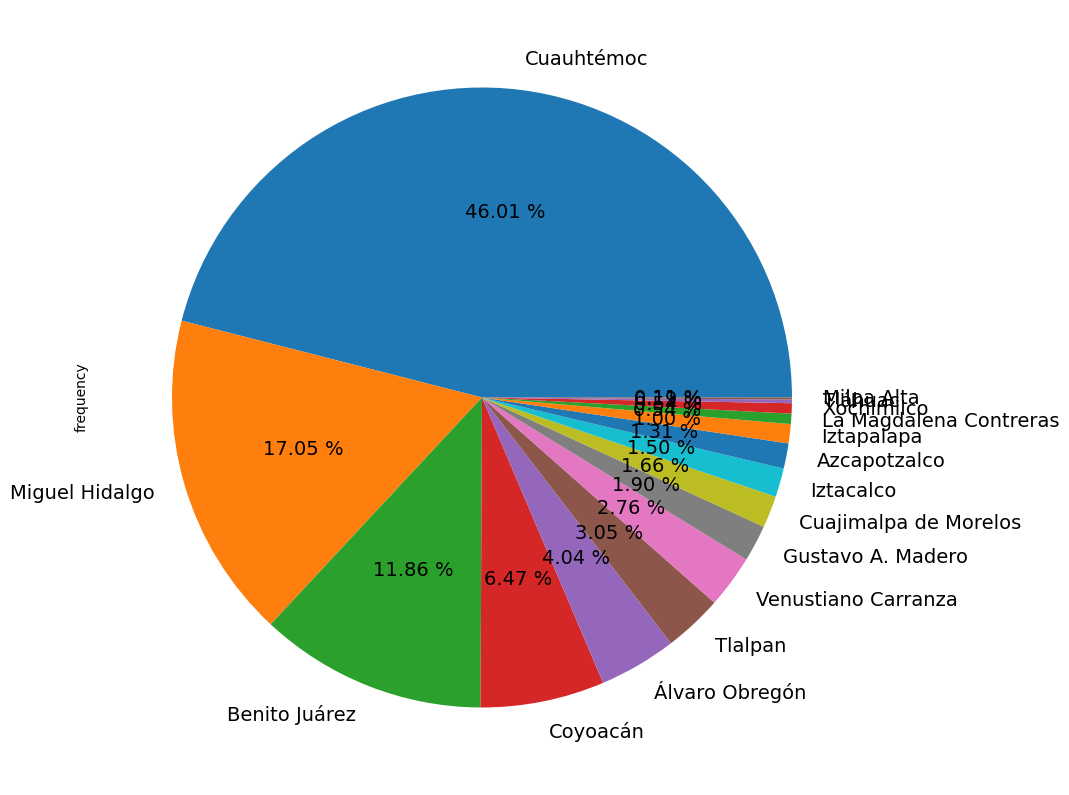

In [134]:
#realizamos grafico de pastel 
table3["frequency"].plot(kind='pie', figsize=(10, 15), autopct='%0.2f %%', textprops={'fontsize': 14, })

**Extracción de Caracteristicas de "last_scraped"**

In [135]:
#Obtengo un analisis univariado de la variable categorica room_type
table4 = freq_tbl(Mexico['last_scraped'])
table4 = table4.drop(['percentage', 'cumulative_perc'], axis=1)
table4 = table4.set_index('last_scraped')
table4

,frequency
last_scraped,
2024-09-25,15745
2024-09-26,10837


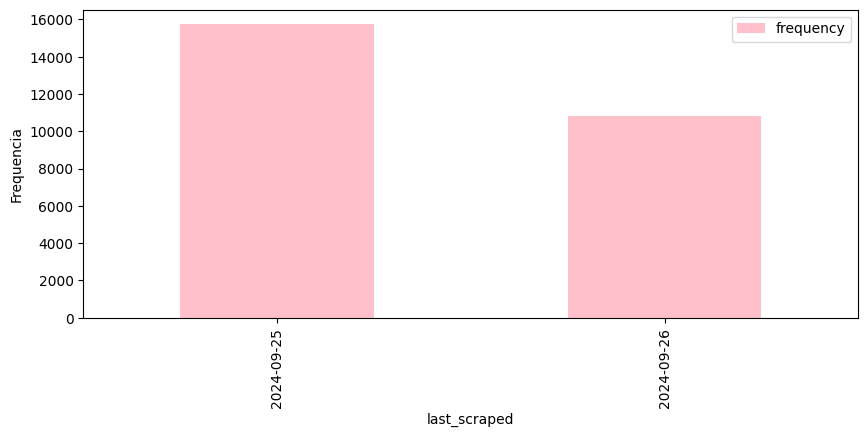

In [136]:
#Realizamos un grafico de barras para visualizar los datos
table4.plot(kind='bar', color='pink', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_scraped')
plt.show()

**Extracción de Caracteristicas de "host_since"**

In [137]:
#Obtengo un analisis univariado de la variable categorica room_type
table5 = freq_tbl(Mexico['host_since'])
table5 = table5.drop(['percentage', 'cumulative_perc'], axis=1)
table5 = table5[table5['frequency'] > 40]
table5 = table5.set_index('host_since')
table5

,frequency
host_since,
2023-01-30,267
2013-12-22,216
2020-02-02,177
2023-09-28,174
2016-04-27,156
2018-08-04,129
2023-01-26,127
2019-02-26,116
2016-08-22,115


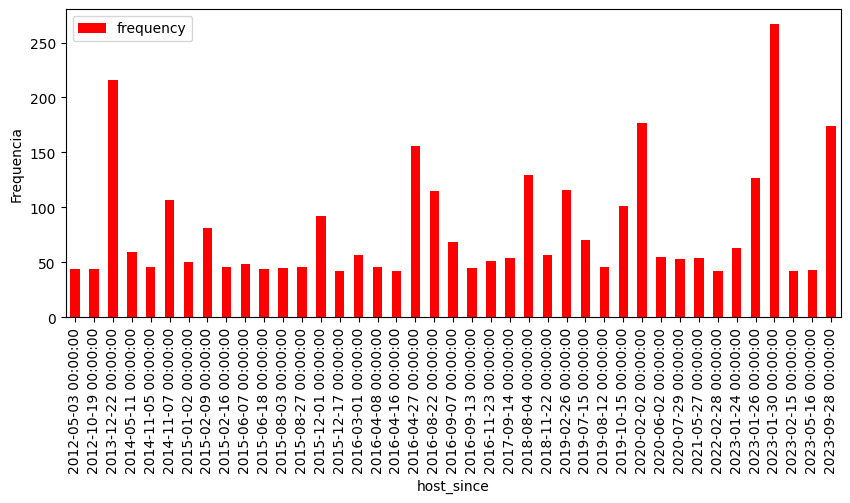

In [138]:
# Convertir el índice a formato de fecha
table5.index = pd.to_datetime(table5.index, format='%Y-%m-%d')

# Ordenar el DataFrame por el índice de fecha
table5 = table5.sort_index()

# Realizar un gráfico de barras para visualizar los datos
table5.plot(kind='bar', color='red', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('host_since')
plt.show()

**Extracción de Caracteristicas de "host_response_time"**

In [139]:
#Obtengo un analisis univariado de la variable categorica room_type
table6 = freq_tbl(Mexico['host_response_time'])
table6 = table6.drop(['percentage', 'cumulative_perc'], axis=1)
table6 = table6.set_index('host_response_time')
table6

,frequency
host_response_time,
within an hour,22414
within a few hours,1957
a few days or more,1108
within a day,1103


<Axes: ylabel='frequency'>

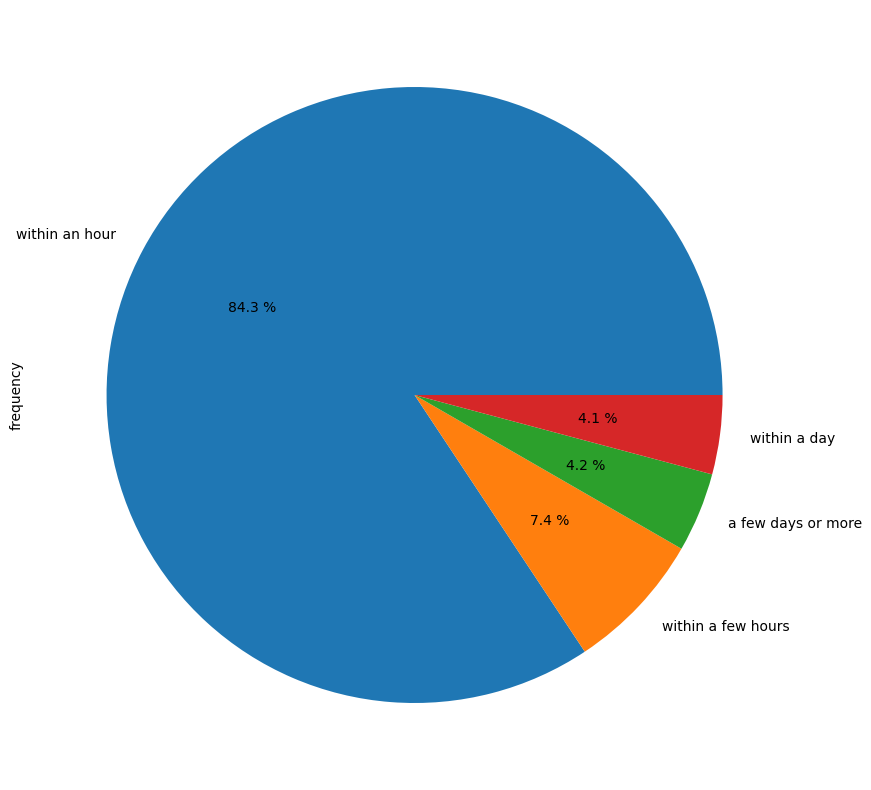

In [140]:
#realizamos grafico de pastel del dataframe filtrado
table6["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "host_response_rate"**

In [141]:
#Obtengo un analisis univariado de la variable categorica room_type
table7 = freq_tbl(Mexico['host_response_rate'])
table7 = table7.drop(['percentage', 'cumulative_perc'], axis=1)
table7 = table7.set_index('host_response_rate')
table7 = table7[table7['frequency'] > 20]
table7

,frequency
host_response_rate,
100%,17583
No contiene host_response_rate,3622
99%,1106
0%,567
90%,559
98%,262
80%,234
97%,222
96%,194


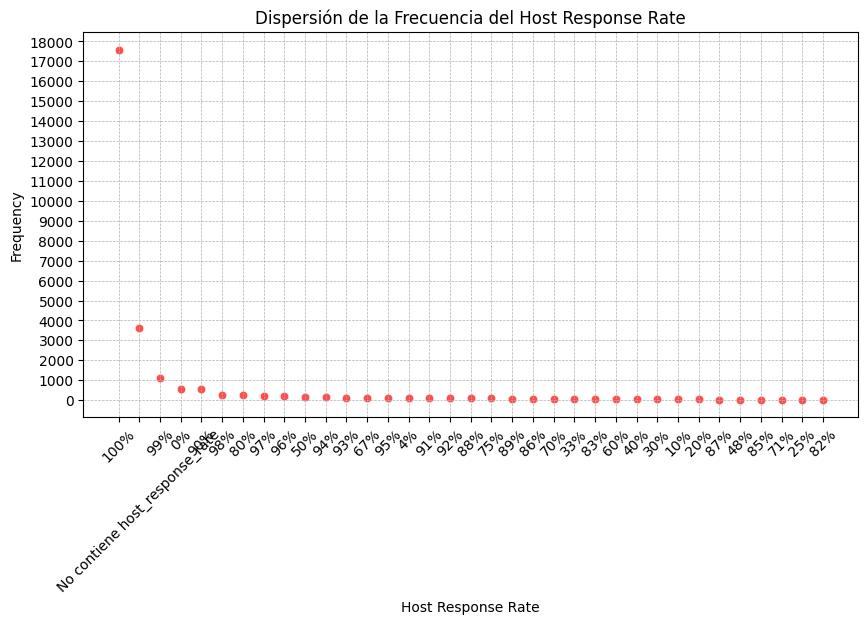

In [142]:
# Crear gráfica de dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x=table7.index, y=table7['frequency'], color='red', alpha=0.7)

# Etiquetas y título
plt.xlabel('Host Response Rate')
plt.ylabel('Frequency')
plt.title('Dispersión de la Frecuencia del Host Response Rate')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

# Ajustar los intervalos del eje Y manualmente
max_freq = table7['frequency'].max()
plt.yticks(np.arange(0, max_freq + 1000, step=1000))  # Intervalos de 1000 (ajusta según necesidad)

plt.grid(True, linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()



**Extracción de Caracteristicas de "host_acceptance_rate"**

In [143]:
#Obtengo un analisis univariado de la variable categorica room_type
table8 = freq_tbl(Mexico['host_acceptance_rate'])
table8 = table8.drop(['percentage', 'cumulative_perc'], axis=1)
table8 = table8[table8['frequency'] > 20]
table8 = table8.set_index('host_acceptance_rate')
table8

,frequency
host_acceptance_rate,
100%,10846
99%,3339
No contiene host_acceptance_rate,2869
98%,1418
97%,1095
0%,904
96%,683
95%,331
94%,331


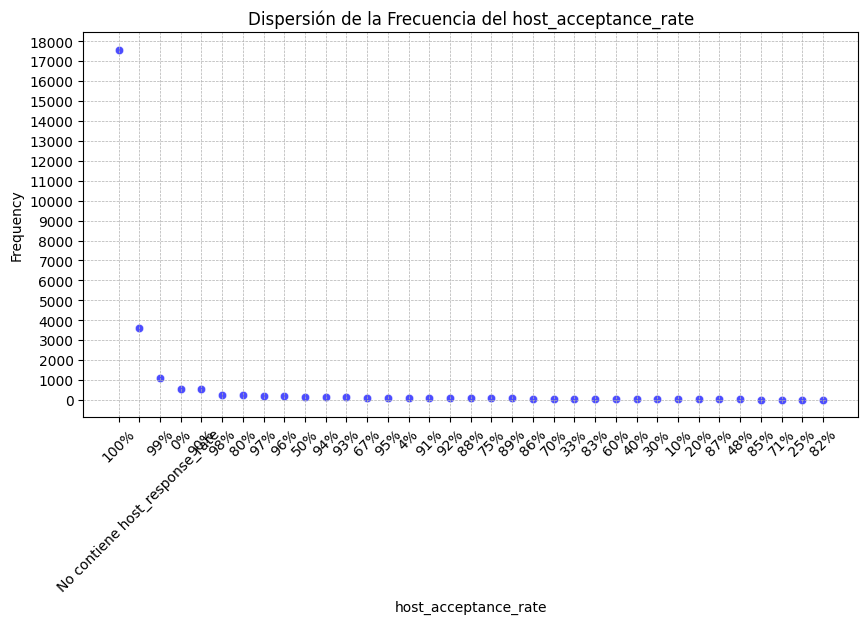

In [144]:
# Crear gráfica de dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x=table7.index, y=table7['frequency'], color='blue', alpha=0.7)

# Etiquetas y título
plt.xlabel('host_acceptance_rate')
plt.ylabel('Frequency')
plt.title('Dispersión de la Frecuencia del host_acceptance_rate')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

# Ajustar los intervalos del eje Y manualmente
max_freq = table7['frequency'].max()
plt.yticks(np.arange(0, max_freq + 1000, step=1000))  # Intervalos de 1000 (ajusta según necesidad)

plt.grid(True, linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()


**Extracción de Caracteristicas de "host_is_superhost"**

In [145]:
#Obtengo un analisis univariado de la variable categorica room_type
table8 = freq_tbl(Mexico['host_is_superhost'])
table8 = table8.drop(['percentage', 'cumulative_perc'], axis=1)
table8 = table8.set_index('host_is_superhost')
table8

,frequency
host_is_superhost,
f,15346
t,11236


<Axes: ylabel='frequency'>

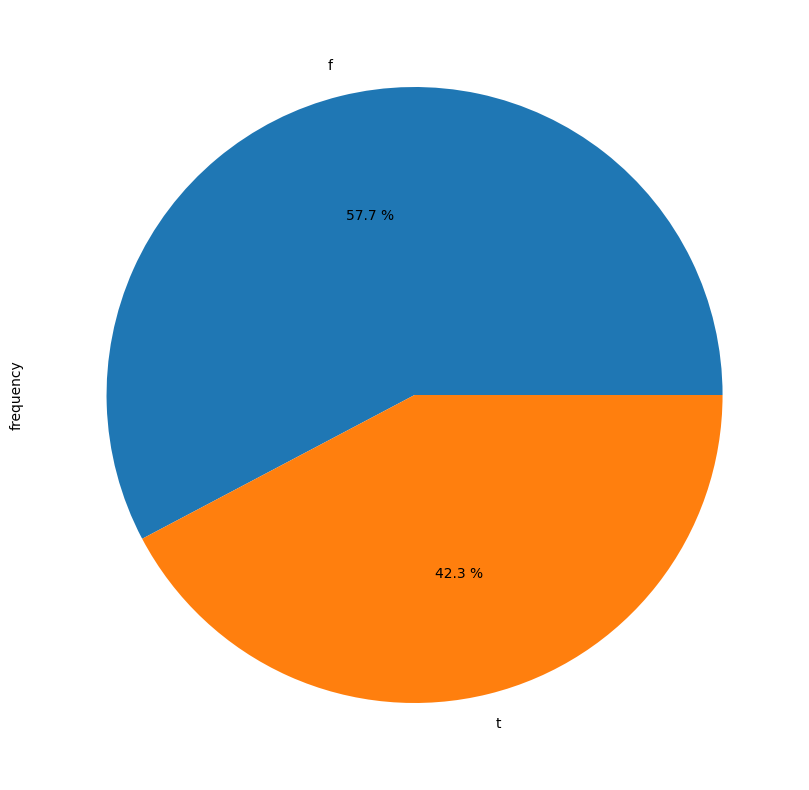

In [146]:
#realizamos grafico de pastel del dataframe filtrado
table8["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "host_verifications"**

In [147]:
#Obtengo un analisis univariado de la variable categorica host_verifications
table9 = freq_tbl(Mexico['host_verifications'])
table9 = table9.drop(['percentage', 'cumulative_perc'], axis=1)
table9 = table9.set_index('host_verifications')
table9

,frequency
host_verifications,
"['email', 'phone']",20504
"['email', 'phone', 'work_email']",3381
['phone'],2527
"['phone', 'work_email']",105
['email'],33
[],30
"['email', 'work_email']",1
['work_email'],1


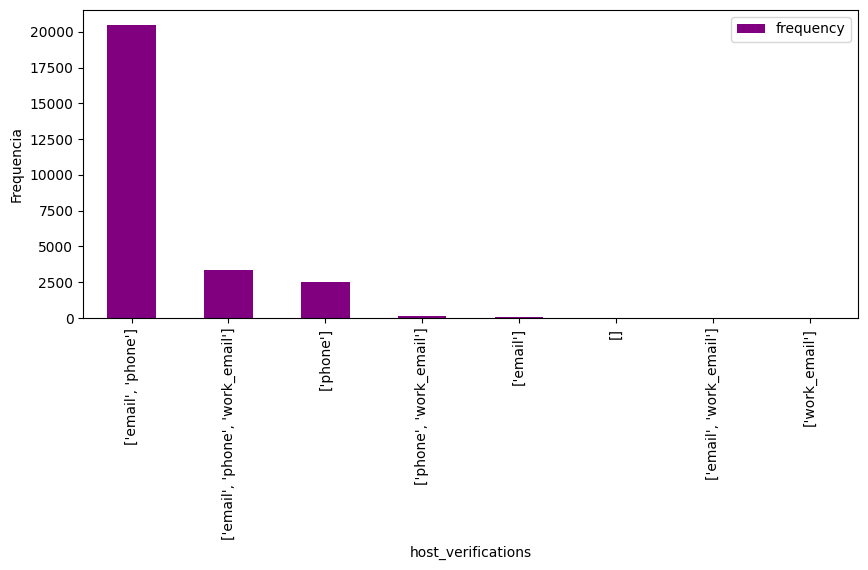

In [148]:
#Realizamos un grafico de barras para visualizar los datos
table9.plot(kind='bar', color='purple', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('host_verifications')
plt.show()

**Extracción de Caracteristicas de "host_identity_verified"**

In [149]:
#Obtengo un analisis univariado de la variable host_identity_verified
table10 = freq_tbl(Mexico['host_identity_verified'])
table10 = table10.drop(['percentage', 'cumulative_perc'], axis=1)
table10 = table10.set_index('host_identity_verified')
table10

,frequency
host_identity_verified,
t,25426
f,1156


<Axes: ylabel='frequency'>

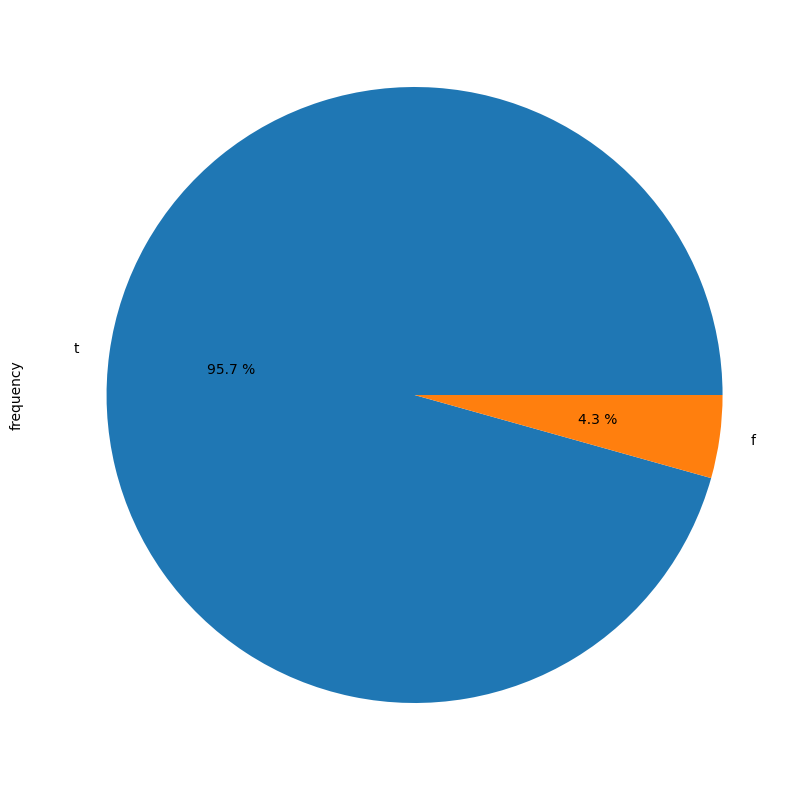

In [150]:
#realizamos grafico de pastel del dataframe filtrado
table10["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "neighbourhood"**

In [151]:
#Obtengo un analisis univariado de la variable categorica neighbourhood
table11 = freq_tbl(Mexico['neighbourhood'])
table11 = table11.drop(['percentage', 'cumulative_perc'], axis=1)
table11 = table11[table11['frequency'] > 5]
table11 = table11.set_index('neighbourhood')
table11

,frequency
neighbourhood,
"Mexico City, Ciudad de México, Mexico",13066
No Hay,10895
"Mexico City, CDMX, Mexico",584
"Mexico City, Distrito Federal, Mexico",463
"Centro, Ciudad de México, Mexico",227
"Mexico City, Federal District, Mexico",183
"Mexico City, Mexico",172
"Juárez, Ciudad de México, Mexico",166
"Mexico City, D.F., Mexico",88


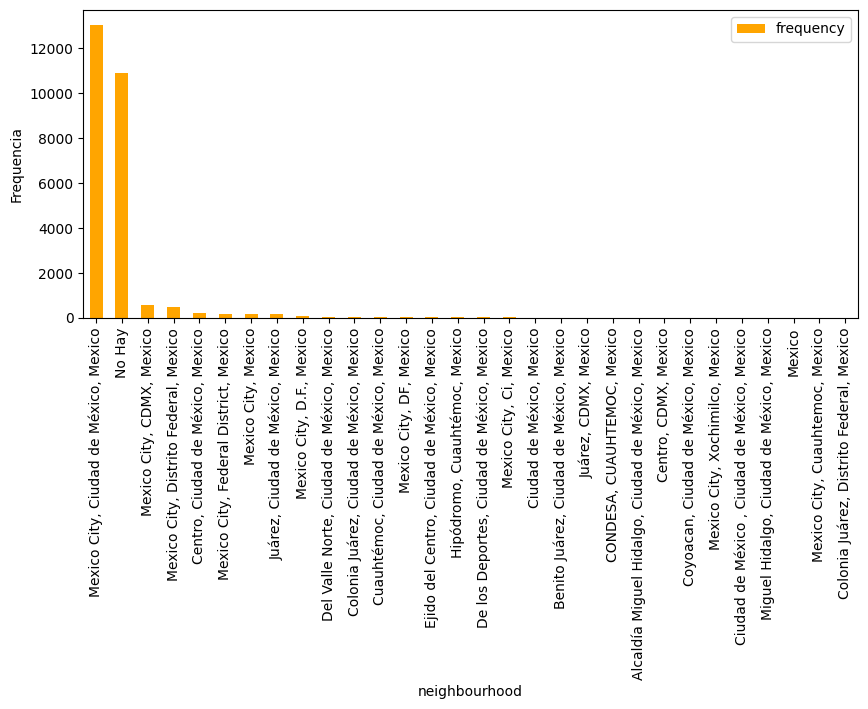

In [152]:
#Realizamos un grafico de barras para visualizar los datos
table11.plot(kind='bar', color='orange', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('neighbourhood')
plt.show()

**Extracción de Caracteristicas de "amenities"**

In [153]:
#Obtengo un analisis univariado de la variable categorica amenities
table12 = freq_tbl(Mexico['amenities'])
table12 = table12.drop(['percentage', 'cumulative_perc'], axis=1)
table12 = table12[table12['frequency'] > 12]
table12 = table12.set_index('amenities')
table12

,frequency
amenities,
"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Refrigerator"", ""Self check-in"", ""Hangers"", ""Backyard"", ""Crib"", ""Long term stays allowed"", ""Essentials"", ""Shampoo"", ""Hot water"", ""TV"", ""Patio or balcony"", ""Bed linens"", ""Kitchen"", ""Private entrance"", ""Air conditioning"", ""Microwave"", ""Cooking basics"", ""Lockbox"", ""Hair dryer""]",71
"[""Iron"", ""High chair"", ""Wifi"", ""Refrigerator"", ""Self check-in"", ""Hangers"", ""Backyard"", ""Crib"", ""Long term stays allowed"", ""Essentials"", ""Shampoo"", ""Hot water"", ""TV"", ""Bed linens"", ""Kitchen"", ""Private entrance"", ""Air conditioning"", ""Elevator"", ""Cooking basics"", ""Lockbox"", ""Hair dryer"", ""Microwave""]",41
[],40
"[""Iron"", ""Wifi"", ""Heating"", ""Self check-in"", ""Hangers"", ""Free parking on premises"", ""Carbon monoxide alarm"", ""Coffee maker"", ""First aid kit"", ""Essentials"", ""Shampoo"", ""Hot water"", ""Luggage dropoff allowed"", ""TV"", ""Bed linens"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Fire extinguisher"", ""Air conditioning"", ""Gym"", ""Dedicated workspace"", ""Hair dryer"", ""Building staff""]",29
"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Refrigerator"", ""Self check-in"", ""Pets allowed"", ""Hangers"", ""Free parking on premises"", ""Dryer \u2013\u00a0In unit"", ""Crib"", ""Long term stays allowed"", ""Essentials"", ""Shampoo"", ""Hot water"", ""TV"", ""Bed linens"", ""Kitchen"", ""Private entrance"", ""Oven"", ""Washer \u2013\u00a0In unit"", ""Microwave"", ""Cooking basics"", ""Lockbox"", ""Hair dryer""]",25
"[""TV"", ""Wifi"", ""Kitchen""]",24
"[""Washer"", ""TV"", ""Wifi"", ""Kitchen"", ""Dedicated workspace""]",23
"[""Iron"", ""Wifi"", ""Refrigerator"", ""Self check-in"", ""Hangers"", ""Backyard"", ""Long term stays allowed"", ""Essentials"", ""Shampoo"", ""Hot water"", ""TV"", ""Bed linens"", ""Kitchen"", ""Private entrance"", ""Air conditioning"", ""Elevator"", ""Cooking basics"", ""Lockbox"", ""Hair dryer"", ""Microwave""]",20
"[""Washer"", ""TV"", ""Wifi"", ""Kitchen""]",18


<Axes: ylabel='frequency'>

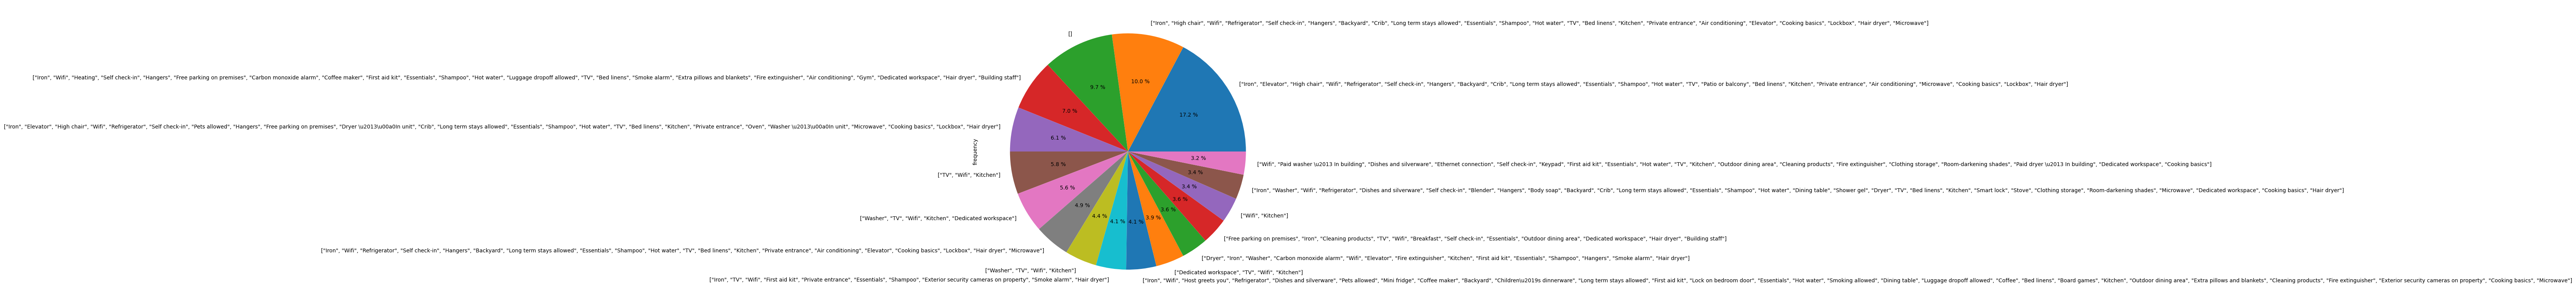

In [154]:
#realizamos grafico de pastel del dataframe filtrado
table12["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "has_availability"**

In [155]:
#Obtengo un analisis univariado de la variable categorica has_availability
table13 = freq_tbl(Mexico['has_availability'])
table13 = table13.drop(['percentage', 'cumulative_perc'], axis=1)
table13 = table13.set_index('has_availability')
table13

,frequency
has_availability,
t,25533
f,1049


<Axes: ylabel='frequency'>

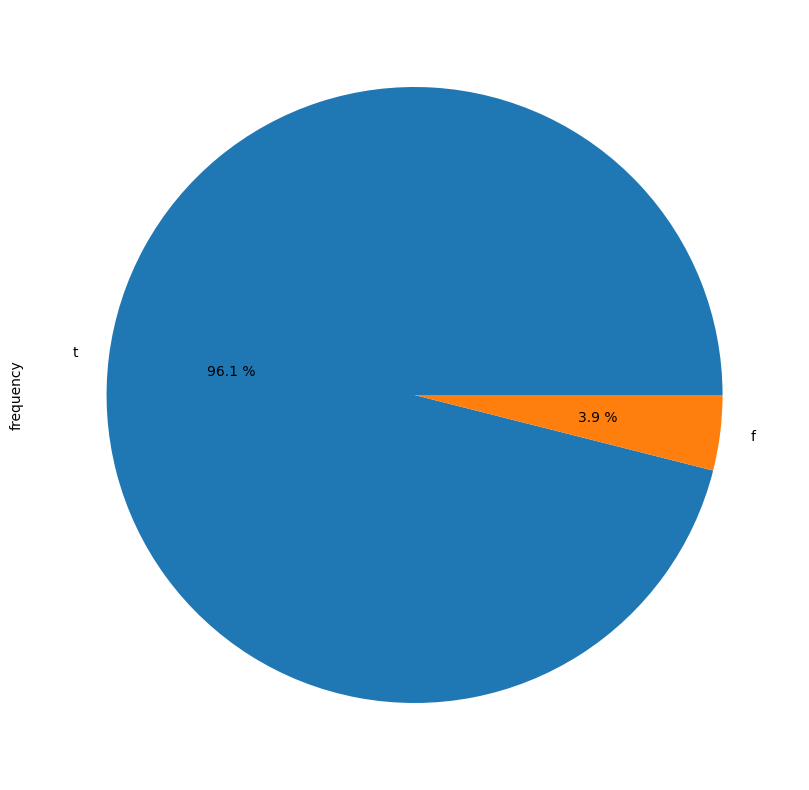

In [156]:
#realizamos grafico de pastel del dataframe filtrado
table13["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "calendar_last_scraped"**

In [157]:
#Obtengo un analisis univariado de la variable categorica calendar_last_scraped
table14 = freq_tbl(Mexico['calendar_last_scraped'])
table14 = table14.drop(['percentage', 'cumulative_perc'], axis=1)
table14 = table14.set_index('calendar_last_scraped')
table14

,frequency
calendar_last_scraped,
2024-09-25,15757
2024-09-26,10825


<Axes: ylabel='frequency'>

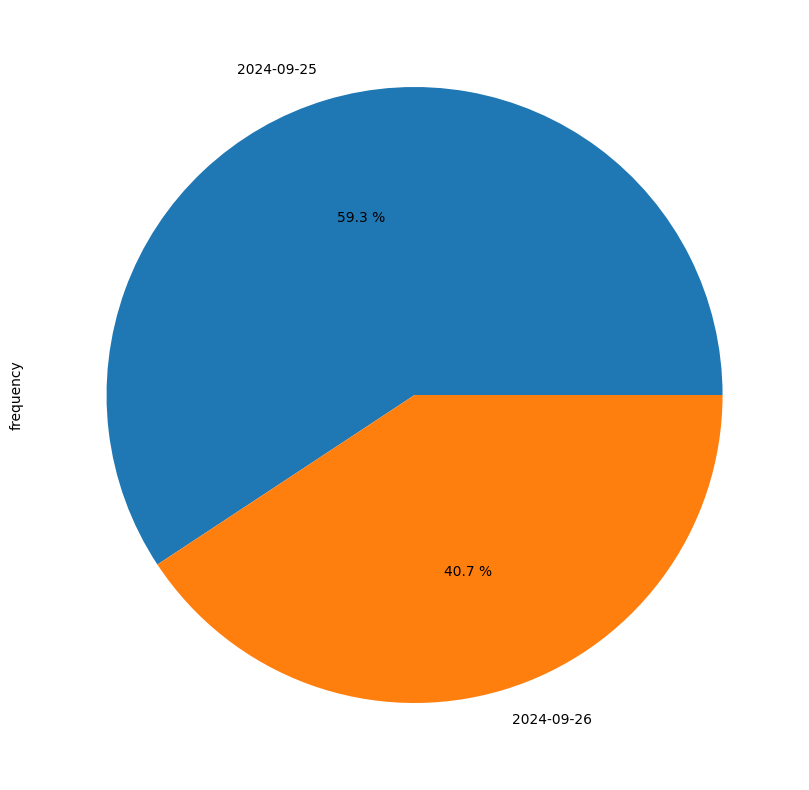

In [158]:
#realizamos grafico de pastel del dataframe filtrado
table14["frequency"].plot(kind='pie', figsize=(10, 10), autopct='%0.1f %%')

**Extracción de Caracteristicas de "first_review"**

In [159]:
#Obtengo un analisis univariado de la variable categorica first_review
table16 = freq_tbl(Mexico['first_review'])
table16 = table16.drop(['percentage', 'cumulative_perc'], axis=1)
table16 = table16[table16['frequency'] > 50]
table16 = table16.set_index('first_review')
table16

,frequency
first_review,
2024-09-16,141
2024-09-22,137
2023-08-27,121
2022-10-31,118
2024-06-30,112
2024-08-11,92
2023-10-29,89
2023-10-30,87
2024-09-08,87


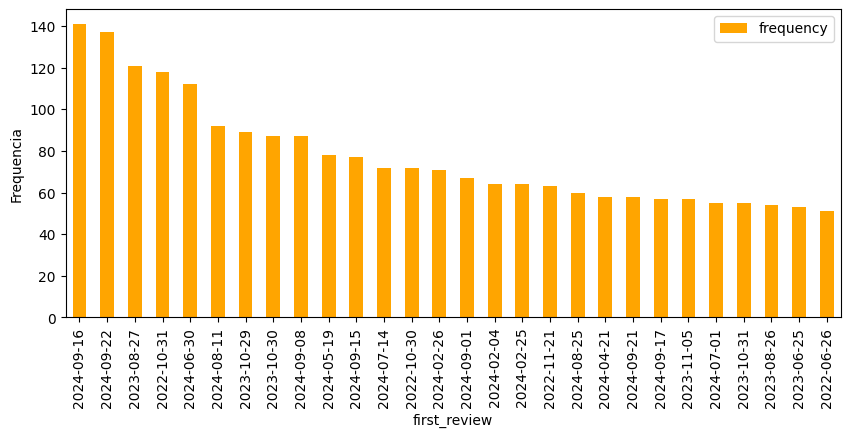

In [160]:
#Realizamos un grafico de barras para visualizar los datos
table16.plot(kind='bar', color='orange', width=0.5, figsize=(10, 4))
plt.ylabel('Frequencia')
plt.xlabel('first_review')
plt.show()

**Extracción de Caracteristicas de "last_review"**

In [161]:
#Obtengo un analisis univariado de la variable categorica last_review
table17 = freq_tbl(Mexico['last_review'])
table17 = table17.drop(['percentage', 'cumulative_perc'], axis=1)
table17 = table17[table17['frequency'] > 50]
table17 = table17.set_index('last_review')
table17

,frequency
last_review,
2024-09-22,1407
2024-09-16,1269
2024-09-23,1088
2024-09-17,857
2024-09-08,796
...,...
2024-05-27,57
2024-05-31,55
2024-07-30,55


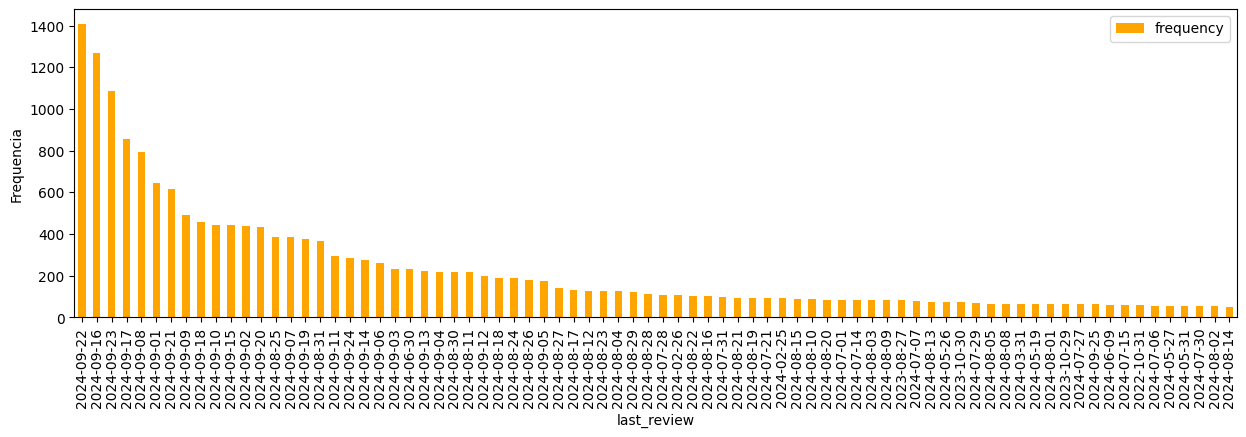

In [162]:
#Realizamos un grafico de barras para visualizar los datos
table17.plot(kind='bar', color='orange', width=0.5, figsize=(15, 4))
plt.ylabel('Frequencia')
plt.xlabel('last_review')
plt.show()

**Extracción de Caracteristicas de "license"**

In [163]:
#Obtengo un analisis univariado de la variable categorica icense
table18 = freq_tbl(Mexico['license'])
table18 = table18.drop(['percentage', 'cumulative_perc'], axis=1)
table18 = table18[table18['frequency'] > 50]
table18 = table18.set_index('license')
table18

,frequency
license,
No cuenta con licencia,26582


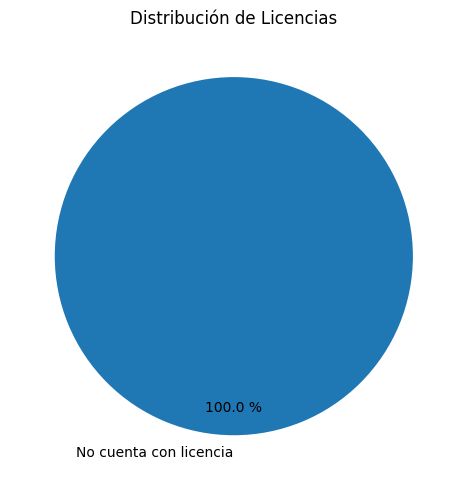

In [164]:
# Crear la figura y el gráfico de pastel
plt.figure(figsize=(5, 5))
table18["frequency"].plot(kind='pie', autopct='%0.1f %%', startangle=90, pctdistance=0.85)
# Agregar un título
plt.title("Distribución de Licencias")
# Ajustar el texto de las etiquetas
plt.ylabel('')  # Elimina el label automático
plt.tight_layout()  # Ajusta el diseño para evitar sobreposición

# Mostrar la gráfica
plt.show()


**Extracción de Caracteristicas de "instant_bookable"**

In [165]:
#Obtengo un analisis univariado de la variable categorica instant_bookable
table19 = freq_tbl(Mexico['instant_bookable'])
table19 = table19.drop(['percentage', 'cumulative_perc'], axis=1)
table19 = table19[table19['frequency'] > 50]
table19 = table19.set_index('instant_bookable')
table19

,frequency
instant_bookable,
f,16080
t,10502


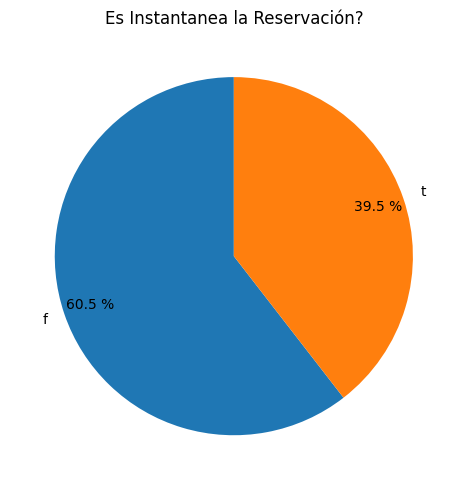

In [166]:
# Crear la figura y el gráfico de pastel
plt.figure(figsize=(5, 5))
table19["frequency"].plot(kind='pie', autopct='%0.1f %%', startangle=90, pctdistance=0.85)
# Agregar un título
plt.title("Es Instantanea la Reservación?")
# Ajustar el texto de las etiquetas
plt.ylabel('')  # Elimina el label automático
plt.tight_layout()  # Ajusta el diseño para evitar sobreposición

# Mostrar la gráfica
plt.show()

In [167]:
# Lista de columnas a verificar
columns_to_check = [
    "host_response_rate", "host_acceptance_rate", "host_total_listings_count", 
    "accommodates", "bathrooms_text", "beds", "price", "maximum_nights_avg_ntm", 
    "availability_365", "number_of_reviews", "review_scores_location", 
    "review_scores_value", "reviews_per_month", "review_scores_communication", 
    "review_scores_checkin", "review_scores_cleanliness", "review_scores_accuracy"
]

# Verificar si las columnas están presentes en el DataFrame
missing_columns = [col for col in columns_to_check if col not in Mexico.columns]

if not missing_columns:
    print("Todas las columnas están presentes en el archivo CSV.")
else:
    print("Las siguientes columnas no están presentes en el archivo CSV:")
    print(missing_columns)

Las siguientes columnas no están presentes en el archivo CSV:
['bathrooms_text', 'maximum_nights_avg_ntm', 'review_scores_value']


**Categorización de la variable number_of_reviews**

In [168]:
#Calculamos el numerto total de la poblacion n
Mexico['number_of_reviews'].info()
n = 26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [169]:
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['number_of_reviews'].min()
Max_reviews = Mexico['number_of_reviews'].max()
Limites = [Min_reviews, Max_reviews]
Limites

[0.0, 135.0]

In [170]:
#Calculamos el rango R
R = Max_reviews - Min_reviews
R

135.0

In [171]:
#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
ni

15.689631010177528

In [187]:
# Ancho del intervalo
i = R / ni
i

0.01593409047273517

In [173]:

# 2. Crear intervalos usando np.linspace()
intervalos_reviews = np.linspace(Min_reviews, Max_reviews, 16)  # 16 puntos generan 15 intervalos

# 3. Definir categorías (una por intervalo, debe haber 15 categorías)
categorias_reviews = [
    'Casi sin reseñas', 'Muy pocas reseñas', 'Pocas reseñas', 'Algunas reseñas', 
    'Reseñas moderadas', 'Varias reseñas', 'Considerables reseñas', 'Muchas reseñas', 
    'Bastantes reseñas', 'Numerosas reseñas', 'Reseñas frecuentes', 'Alta cantidad de reseñas', 
    'Muy alta cantidad de reseñas', 'Reseñas masivas', 'Demasiadas reseñas'
]  # Ahora hay 15 categorías

# 4. Asignar categorías a la columna 'number_of_reviews'
Mexico['number_of_reviews'] = pd.cut(
    x=Mexico['number_of_reviews'], 
    bins=intervalos_reviews, 
    labels=categorias_reviews
)

# 5. Ver los resultados
Mexico['number_of_reviews'].value_counts()



number_of_reviews
Casi sin reseñas                7242
Algunas reseñas                 3901
Muy pocas reseñas               3017
Pocas reseñas                   2025
Reseñas moderadas               1239
Varias reseñas                   994
Considerables reseñas            880
Muchas reseñas                   729
Bastantes reseñas                581
Numerosas reseñas                548
Reseñas frecuentes               454
Alta cantidad de reseñas         397
Muy alta cantidad de reseñas     318
Reseñas masivas                  308
Demasiadas reseñas               293
Name: count, dtype: int64

In [174]:
#Obtengo un analisis univariado de la variable categorica number_of_reviews
table1 = freq_tbl(Mexico['number_of_reviews'])
table1 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table1 = table1[table1['frequency'] > 50]
table1 = table1.set_index('number_of_reviews')
table1

,frequency
number_of_reviews,
Casi sin reseñas,7242
Algunas reseñas,3901
Muy pocas reseñas,3017
Pocas reseñas,2025
Reseñas moderadas,1239
Varias reseñas,994
Considerables reseñas,880
Muchas reseñas,729
Bastantes reseñas,581


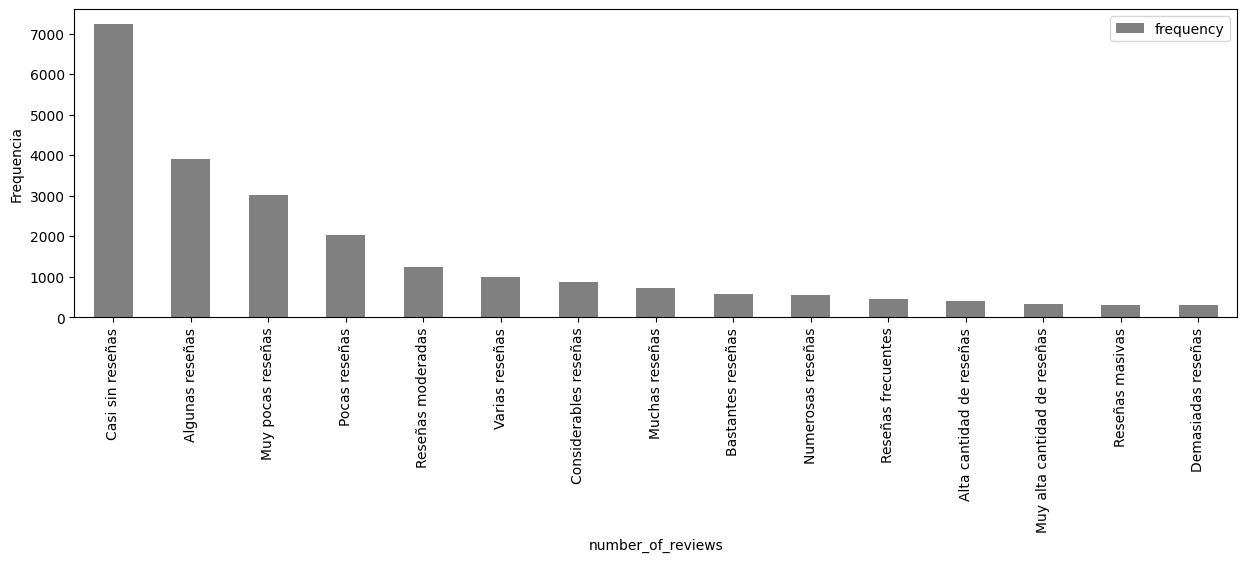

In [175]:
#Realizamos un grafico de barras para visualizar los datos
table1.plot(kind='bar', color='grey', width=0.5, figsize=(15, 4))
plt.ylabel('Frequencia')
plt.xlabel('number_of_reviews')
plt.show()

**Categorización de la variable review_scores_location**

In [176]:
#Calculamos el numerto total de la poblacion n
Mexico['review_scores_location'].info()
n = 26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [177]:
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_location'].min()
Max_reviews = Mexico['review_scores_location'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.75, 5.0]
R:  0.25
ni:  15.689631010177528
i:  0.25


In [178]:
# Definir intervalos manualmente
bins = [0, 1, 2, 3, 4, 5]
labels = ['Muy bajo', 'Bajo', 'Regular', 'Bueno', 'Excelente']

# Aplicar pd.cut()
Mexico['review_scores_location'] = pd.cut(Mexico['review_scores_location'], bins=bins, labels=labels)

# Ver resultados
print(Mexico['review_scores_location'].value_counts())



review_scores_location
Excelente    26582
Muy bajo         0
Bajo             0
Regular          0
Bueno            0
Name: count, dtype: int64


In [179]:
#Obtengo un analisis univariado de la variable categorica review_scores_location
table2 = freq_tbl(Mexico['review_scores_location'])
table2 = table2.drop(['percentage', 'cumulative_perc'], axis=1)
table2 = table2.set_index('review_scores_location')
table2

,frequency
review_scores_location,
Excelente,26582
Muy bajo,0
Bajo,0
Regular,0
Bueno,0


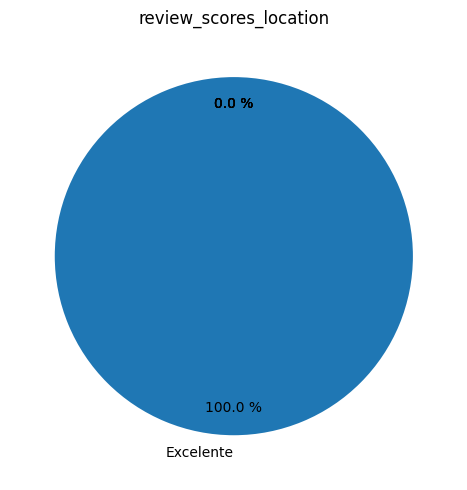

In [180]:
# Crear la figura y el gráfico de pastel
plt.figure(figsize=(5, 5))
table2["frequency"].plot(kind='pie', autopct='%0.1f %%', startangle=90, pctdistance=0.85)
# Agregar un título
plt.title("review_scores_location")
# Ajustar el texto de las etiquetas
plt.ylabel('')  # Elimina el label automático
plt.tight_layout()  # Ajusta el diseño para evitar sobreposición

# Mostrar la gráfica
plt.show()

**Categorización de la variable reviews_per_month**

In [181]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['reviews_per_month'].min()
Max_reviews = Mexico['reviews_per_month'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [0.01, 4.72]
R:  4.71
ni:  15.689631010177528
i:  4.71


In [182]:
# Definir intervalos manualmente
bins = [0, 1, 2, 3, 4, 5]  # Definir cortes para cada categoría
labels = ['Muy bajo', 'Bajo', 'Regular', 'Bueno', 'Excelente']

# Asignar categorías a 'reviews_per_month'
Mexico['reviews_per_month'] = pd.cut(Mexico['reviews_per_month'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['reviews_per_month'].value_counts())


reviews_per_month
Muy bajo     10599
Bajo         10073
Regular       3210
Bueno         1917
Excelente      783
Name: count, dtype: int64


In [183]:
#Obtengo un analisis univariado de la variable categorica reviews_per_month
table3 = freq_tbl(Mexico['reviews_per_month'])
table3 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
table3 = table3.set_index('reviews_per_month')
table3

,frequency
reviews_per_month,
Muy bajo,10599
Bajo,10073
Regular,3210
Bueno,1917
Excelente,783


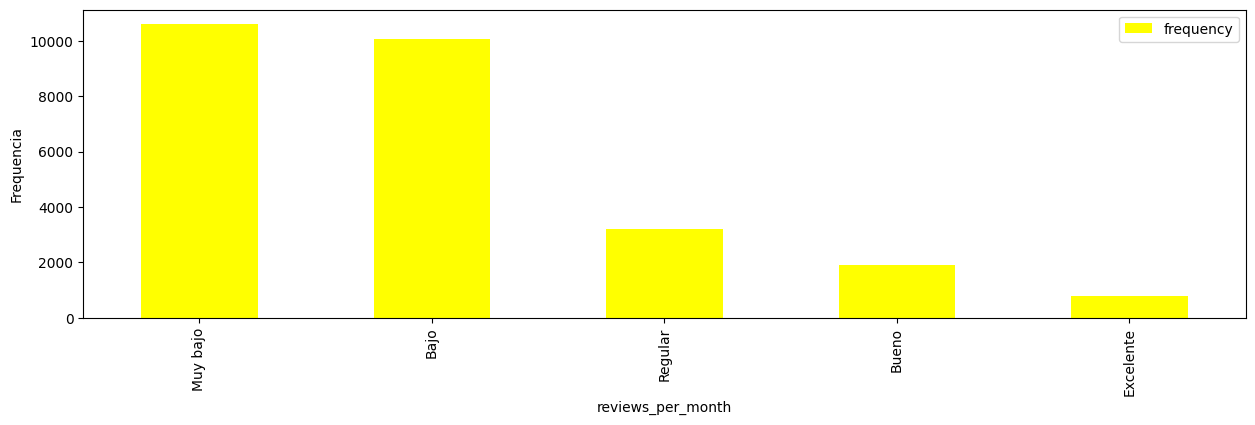

In [184]:
#Realizamos un grafico de barras para visualizar los datos
table3.plot(kind='bar', color='yellow', width=0.5, figsize=(15, 4))
plt.ylabel('Frequencia')
plt.xlabel('reviews_per_month')
plt.show()

**Categorización de la variable "review_scores_communication"**

In [186]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_communication'].min()
Max_reviews = Mexico['review_scores_communication'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.75, 5.0]
R:  0.25
ni:  15.689631010177528
i:  0.01593409047273517


In [188]:
# Definir intervalos manualmente
bins = [4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['Alto', 'Muy alto', 'Excepcional']

# Asignar categorías a 'review_scores_communication'
Mexico['review_scores_communication'] = pd.cut(Mexico['review_scores_communication'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_communication'].value_counts())

review_scores_communication
Excepcional    16852
Muy alto        8084
Alto            1646
Name: count, dtype: int64


In [211]:
#Obtengo un analisis univariado de la variable categorica review_scores_communication
table4 = freq_tbl(Mexico['review_scores_communication'])
table4 = table4.drop(['percentage', 'cumulative_perc'], axis=1)
table4 = table4.set_index('review_scores_communication')
table4

,frequency
review_scores_communication,
Excepcional,16852
Muy alto,8084
Alto,1646


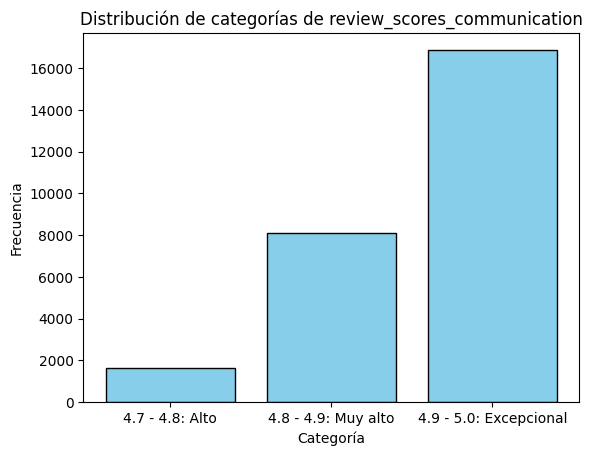

In [212]:
# Definir las categorías y sus frecuencias correctamente
categorias = ['4.7 - 4.8: Alto', '4.8 - 4.9: Muy alto', '4.9 - 5.0: Excepcional']
frecuencias = [1646, 8084, 16852]  # Valores corregidos

# Crear el gráfico de barras
plt.bar(categorias, frecuencias, color='skyblue', edgecolor='black')

# Personalizar la gráfica
plt.title('Distribución de categorías de review_scores_communication')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


**Categorización de la variable "review_scores_checkin"**

In [192]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_checkin'].min()
Max_reviews = Mexico['review_scores_checkin'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.76, 5.0]
R:  0.2400000000000002
ni:  15.689631010177528
i:  0.015296726853825774


In [193]:
# Definir intervalos manualmente
bins = [4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['Alto', 'Muy alto', 'Excepcional']

# Asignar categorías a 'review_scores_checkin'
Mexico['review_scores_checkin'] = pd.cut(Mexico['review_scores_checkin'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_checkin'].value_counts())

review_scores_checkin
Excepcional    16765
Muy alto        8456
Alto            1361
Name: count, dtype: int64


In [198]:
#Obtengo un analisis univariado de la variable categorica review_scores_checkin
table5 = freq_tbl(Mexico['review_scores_checkin'])
table5 = table5.drop(['percentage', 'cumulative_perc'], axis=1)
table5 = table5.set_index('review_scores_checkin')
table5

,frequency
review_scores_checkin,
Excepcional,16765
Muy alto,8456
Alto,1361


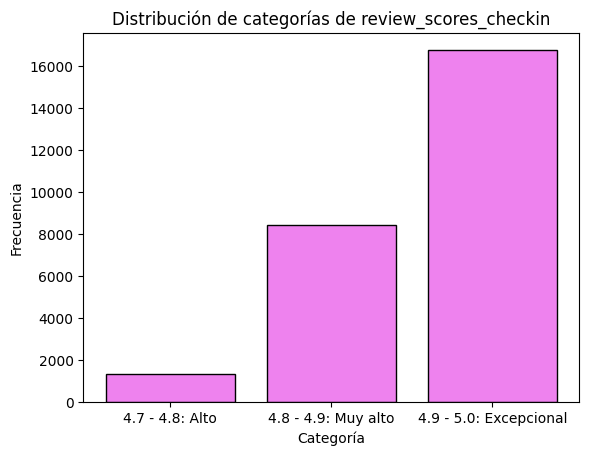

In [213]:
# Definir las categorías y sus frecuencias correctamente
categorias = ['4.7 - 4.8: Alto', '4.8 - 4.9: Muy alto', '4.9 - 5.0: Excepcional']
frecuencias = [1361, 8456, 16765]  # Valores corregidos

# Crear el gráfico de barras
plt.bar(categorias, frecuencias, color='violet', edgecolor='black')

# Personalizar la gráfica
plt.title('Distribución de categorías de review_scores_checkin')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


**Categorización de la variable "review_scores_cleanliness"**

In [196]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_cleanliness'].min()
Max_reviews = Mexico['review_scores_cleanliness'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.64, 5.0]
R:  0.3600000000000003
ni:  15.689631010177528
i:  0.022945090280738663


In [197]:
# Definir intervalos manualmente
bins = [4.6, 4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['4.6 - 4.7: Bajo', '4.7 - 4.8: Medio', '4.8 - 4.9: Alto', '4.9 - 5.0: Excepcional']

# Asignar categorías a 'review_scores_cleanliness'
Mexico['review_scores_cleanliness'] = pd.cut(Mexico['review_scores_cleanliness'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_cleanliness'].value_counts())

review_scores_cleanliness
4.8 - 4.9: Alto           9199
4.9 - 5.0: Excepcional    8775
4.7 - 4.8: Medio          7080
4.6 - 4.7: Bajo           1528
Name: count, dtype: int64


In [200]:
#Obtengo un analisis univariado de la variable categorica review_scores_cleanliness
table6 = freq_tbl(Mexico['review_scores_cleanliness'])
table6 = table6.drop(['percentage', 'cumulative_perc'], axis=1)
table6 = table6.set_index('review_scores_cleanliness')
table6

,frequency
review_scores_cleanliness,
4.8 - 4.9: Alto,9199
4.9 - 5.0: Excepcional,8775
4.7 - 4.8: Medio,7080
4.6 - 4.7: Bajo,1528


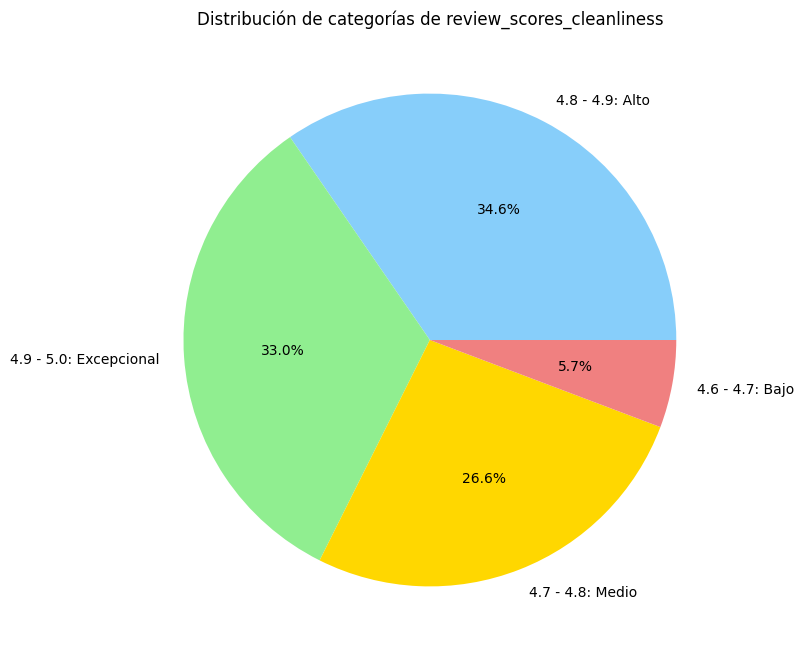

In [201]:
# Datos de la tabla table6
frecuencias = table6['frequency']
etiquetas = table6.index  # Las etiquetas ya están en el índice de la tabla

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencias, labels=etiquetas, autopct='%1.1f%%', colors=['lightskyblue', 'lightgreen', 'gold', 'lightcoral'])
plt.title('Distribución de categorías de review_scores_cleanliness')
plt.show()

**Categorización de la variable "review_scores_accuracy"**

In [202]:
n = 26582
# 1. Obtener valores mínimo y máximo
Min_reviews = Mexico['review_scores_accuracy'].min()
Max_reviews = Mexico['review_scores_accuracy'].max()
Limites = [Min_reviews, Max_reviews]
print("Limites: ",Limites)

#Calculamos el rango R
R = Max_reviews - Min_reviews
print("R: ",R)

#Calculamos el numero de intervalos de clase "ni", aplicacndo la regla de Sturges
ni = 1 + 3.32*np.log10(n)
print("ni: ", ni)

# Ancho del intervalo
i = R / ni
print("i: ",i)

Limites:  [4.69, 5.0]
R:  0.3099999999999996
ni:  15.689631010177528
i:  0.019758272186191583


In [203]:
# Definir intervalos manualmente
bins = [4.6, 4.7, 4.8, 4.9, 5.0]  # Definir cortes para cada categoría
labels = ['4.6 - 4.7: Bajo', '4.7 - 4.8: Medio', '4.8 - 4.9: Alto', '4.9 - 5.0: Excepcional']

# Asignar categorías a 'review_scores_accuracy'
Mexico['review_scores_accuracy'] = pd.cut(Mexico['review_scores_accuracy'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de categorías
print(Mexico['review_scores_accuracy'].value_counts())

review_scores_accuracy
4.9 - 5.0: Excepcional    10028
4.8 - 4.9: Alto            9456
4.7 - 4.8: Medio           6762
4.6 - 4.7: Bajo             336
Name: count, dtype: int64


In [205]:
#Obtengo un analisis univariado de la variable categorica review_scores_accuracy
table7 = freq_tbl(Mexico['review_scores_accuracy'])
table7 = table7.drop(['percentage', 'cumulative_perc'], axis=1)
table7 = table7.set_index('review_scores_accuracy')
table7

,frequency
review_scores_accuracy,
4.9 - 5.0: Excepcional,10028
4.8 - 4.9: Alto,9456
4.7 - 4.8: Medio,6762
4.6 - 4.7: Bajo,336


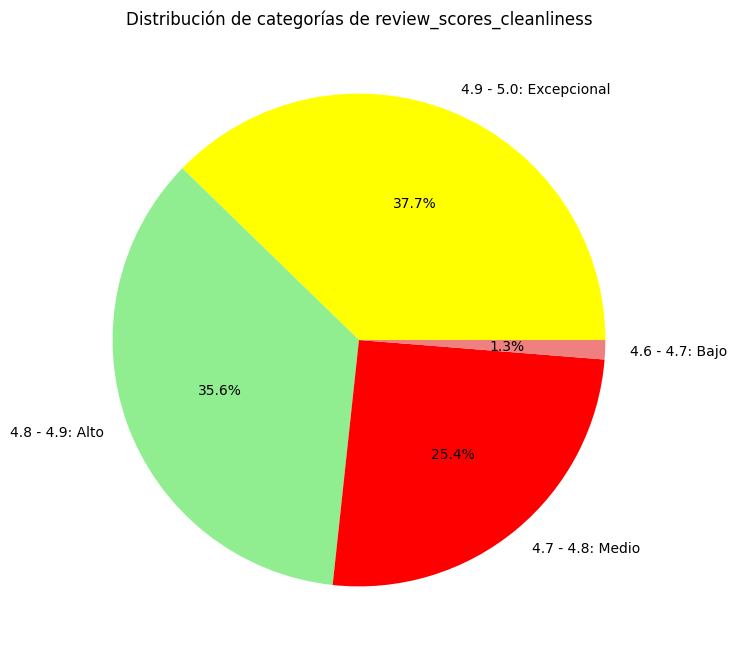

In [210]:
# Datos de la tabla table6
frecuencias = table7['frequency']
etiquetas = table7.index  # Las etiquetas ya están en el índice de la tabla

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencias, labels=etiquetas, autopct='%1.1f%%', colors=['yellow', 'lightgreen', 'red', 'lightcoral'])
plt.title('Distribución de categorías de review_scores_cleanliness')
plt.show()